**Imports**

In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

**Downloading dataset**

In [504]:
!gdown 19XmnxajrIQL76E_r7JYnHfSZ20EOOPU9

Downloading...
From: https://drive.google.com/uc?id=19XmnxajrIQL76E_r7JYnHfSZ20EOOPU9
To: /content/bank-full.csv
100% 4.61M/4.61M [00:00<00:00, 63.6MB/s]


**Reading The dataset**

In [505]:
data = pd.read_csv("bank-full.csv", delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**The Dataset Information**

In [506]:
data.shape

(45211, 17)

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Analysis the Dataset**

***Exploring the Categorical Features***

In [508]:
# Exploring the Categorical Features
categoricalFeatures = [feature for feature in data.columns if ((data[feature].dtypes=='O')&(feature not in ['y']))]
print('Total Categorical Features are : {}'.format(len(categoricalFeatures)))
categoricalFeatures

Total Categorical Features are : 9


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [509]:
# Unique value of the Categorical Features
for feature in categoricalFeatures:
    print('Feature: {} --> Total Unique Number: {}'.format(feature,len(data[feature].unique())))

Feature: job --> Total Unique Number: 12
Feature: marital --> Total Unique Number: 3
Feature: education --> Total Unique Number: 4
Feature: default --> Total Unique Number: 2
Feature: housing --> Total Unique Number: 2
Feature: loan --> Total Unique Number: 2
Feature: contact --> Total Unique Number: 3
Feature: month --> Total Unique Number: 12
Feature: poutcome --> Total Unique Number: 4


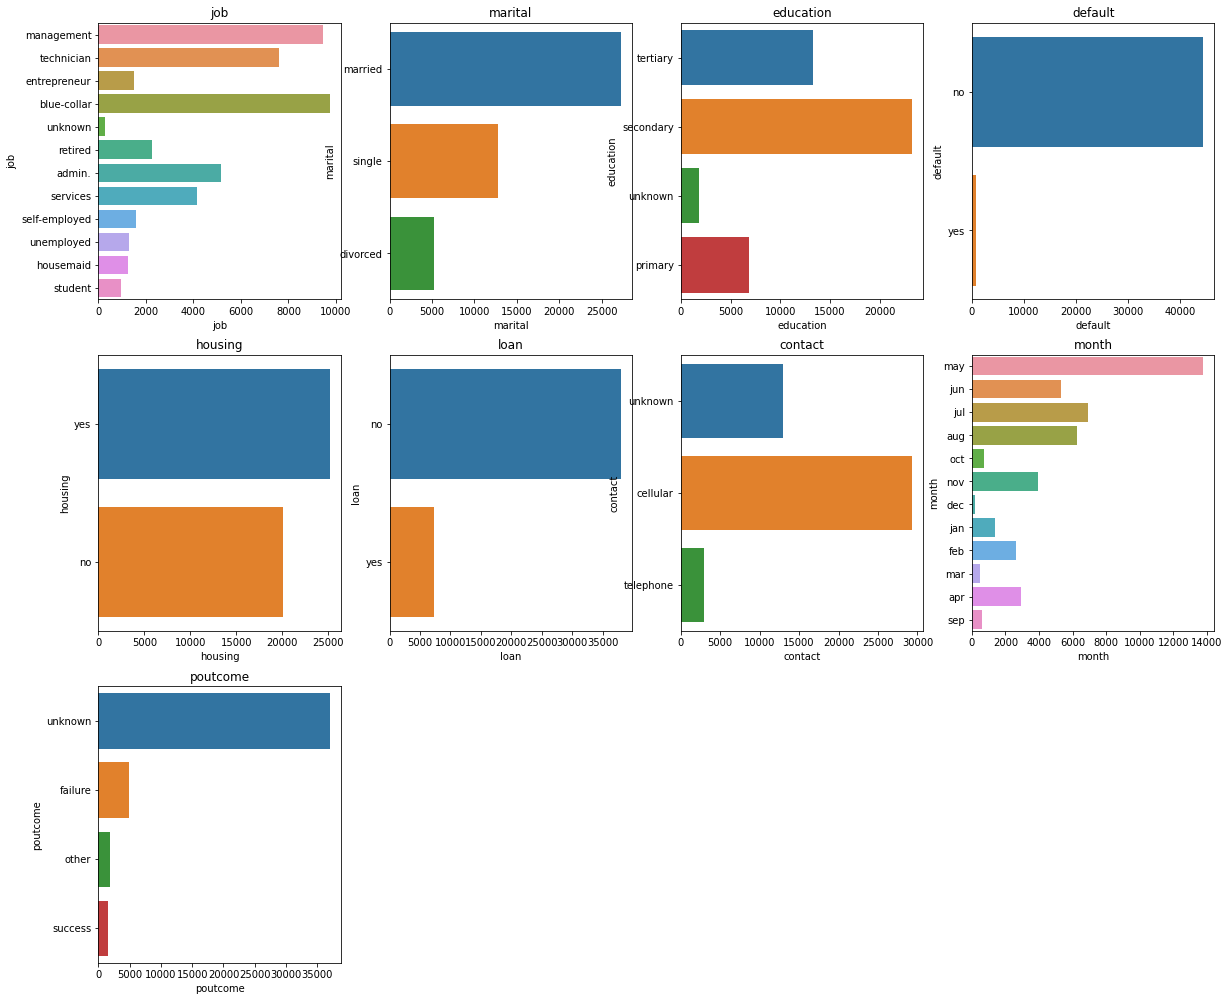

In [510]:
# Categorical Features Distribution
plt.figure(figsize=(20,60))
plotnumber =1
for categoricalFeature in categoricalFeatures:
    ax = plt.subplot(10,4,plotnumber)
    sns.countplot(y=categoricalFeature,data=data)
    plt.xlabel(categoricalFeature)
    plt.title(categoricalFeature)
    plotnumber+=1
plt.show()

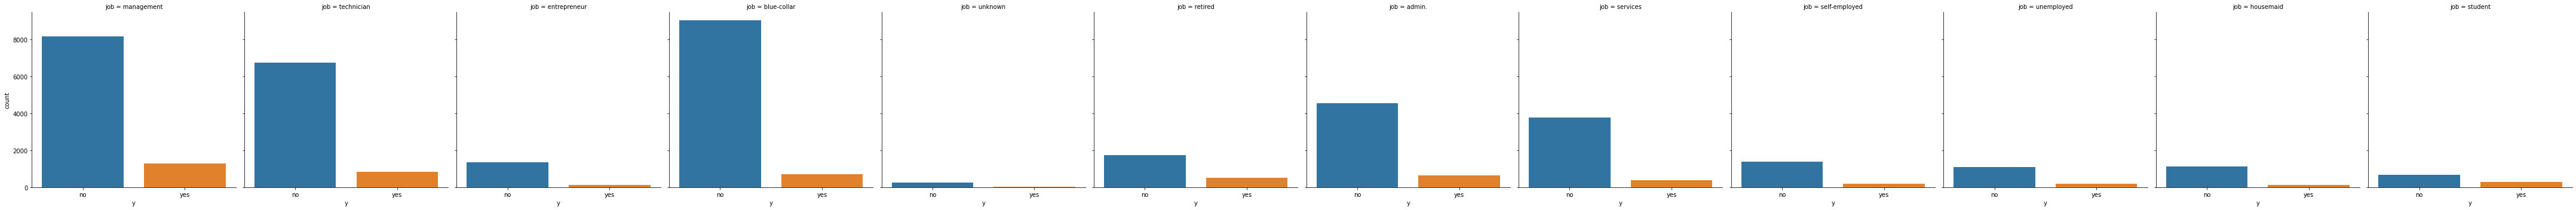

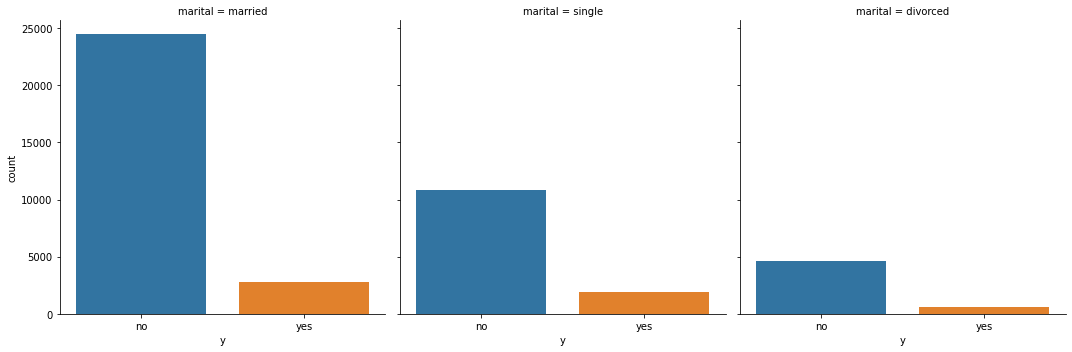

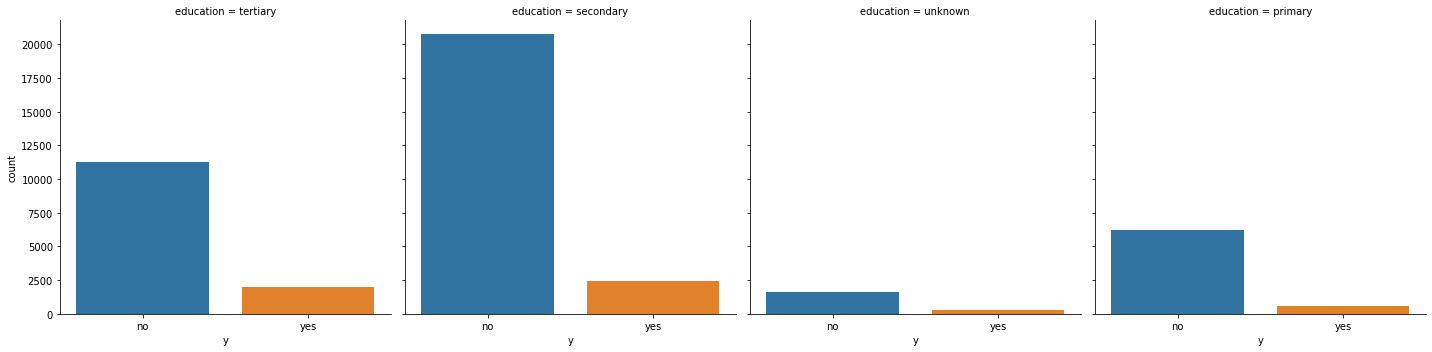

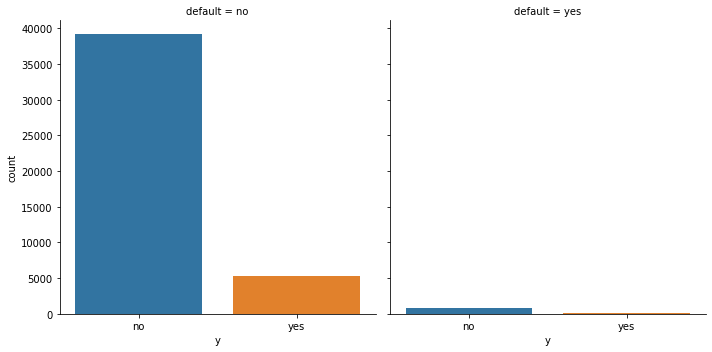

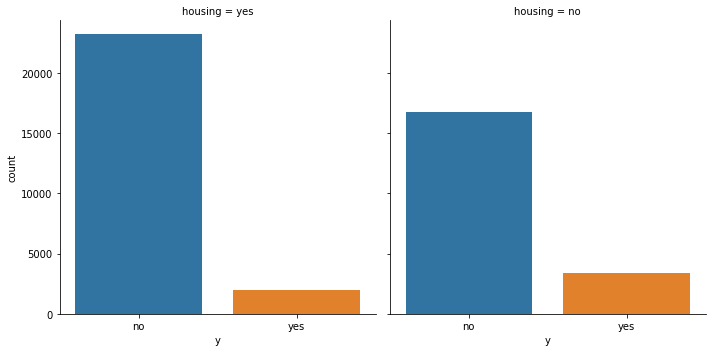

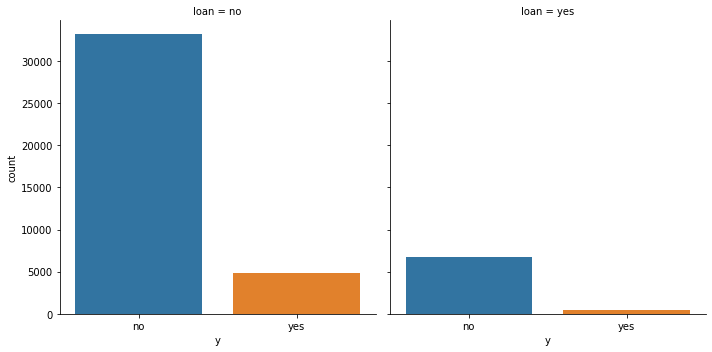

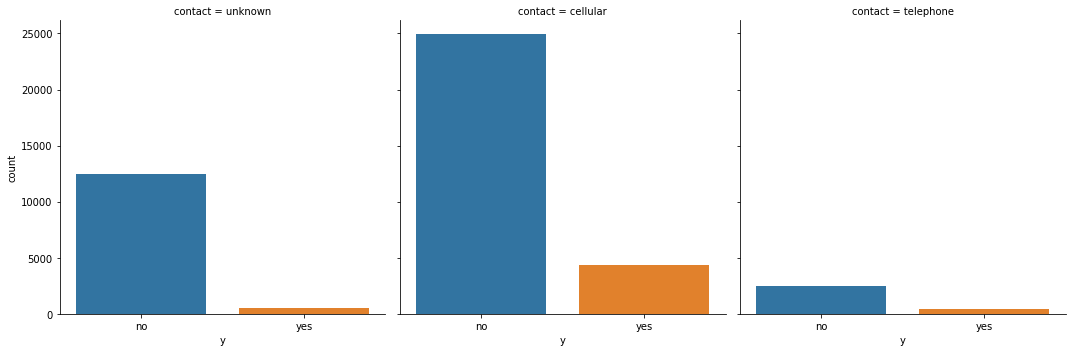

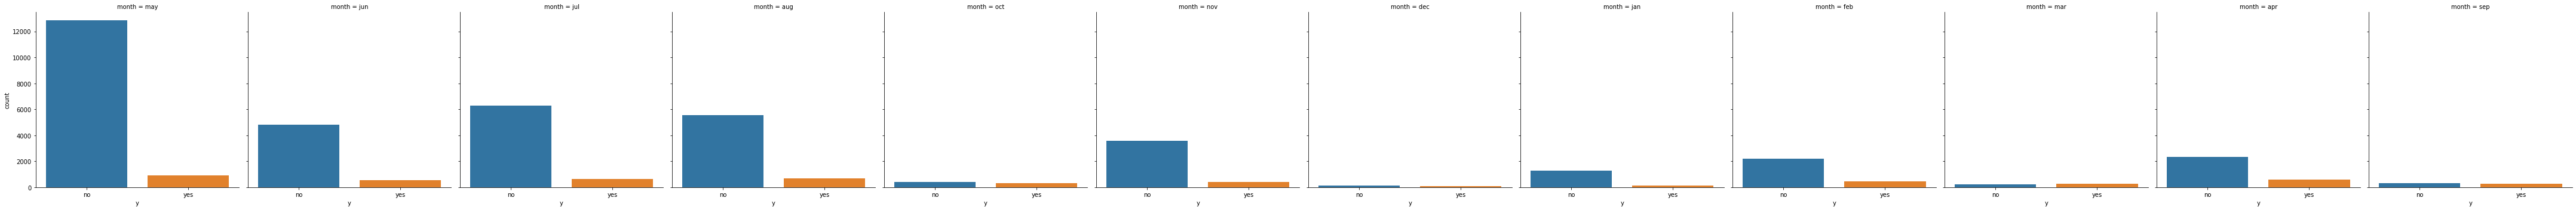

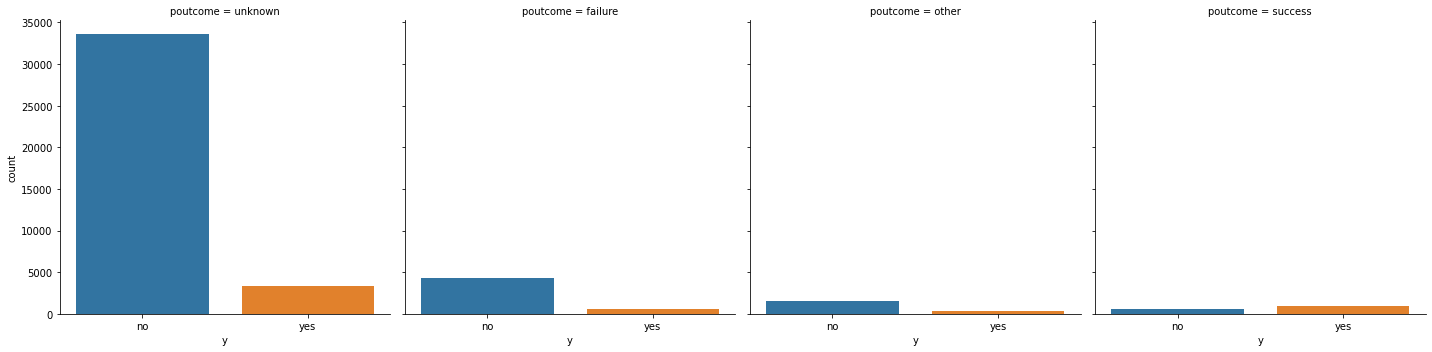

In [511]:
#Relationship between Categorical Features and Label Y
for categoricalFeature in categoricalFeatures:
    sns.catplot(x='y', col=categoricalFeature, kind='count', data  = data)
plt.show()

**Exploring the Numerical Features**

In [512]:
# Exploring the Numerical Features
numericalFeatures = [feature for feature in data.columns if ((data[feature].dtypes!='O')&(feature not in ['y']))]
print('Total Categorical Features are : {}'.format(len(numericalFeatures)))
numericalFeatures

Total Categorical Features are : 7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

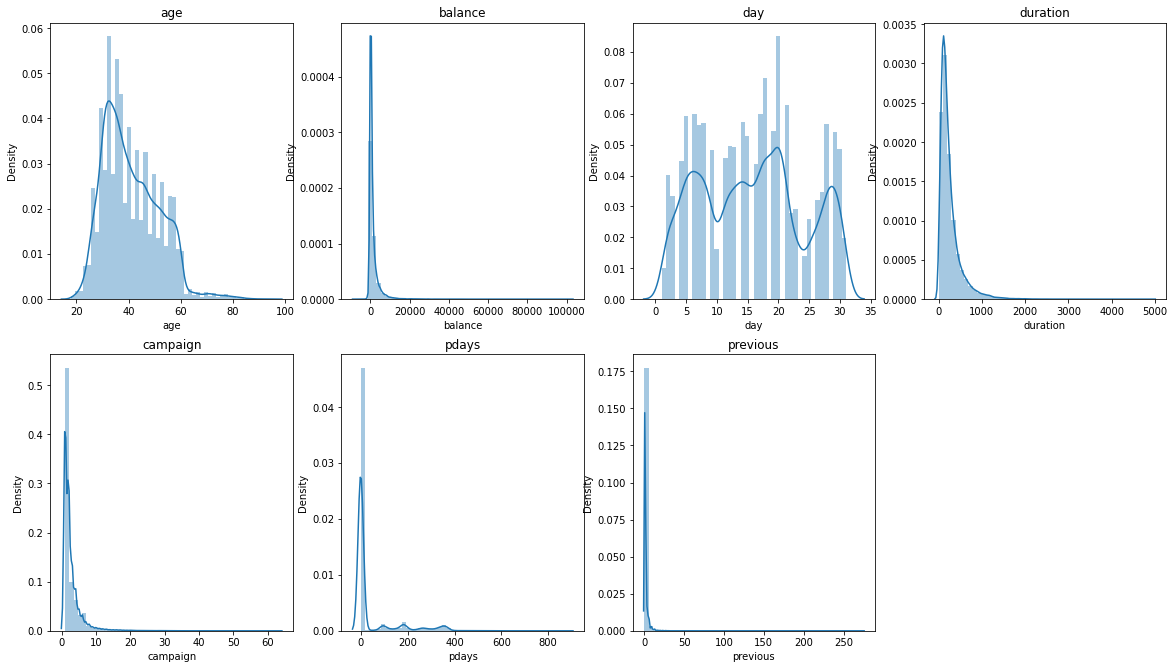

In [513]:
# Numerical Features Distribution
plt.figure(figsize=(20,60))
plotnumber =1
for numericalFeature in numericalFeatures:
    ax = plt.subplot(10,4,plotnumber)
    # sns.countplot(y=numericalFeature,data=data)
    sns.distplot(data[numericalFeature])
    plt.xlabel(numericalFeature)
    plt.title(numericalFeature)
    plotnumber+=1
plt.show()

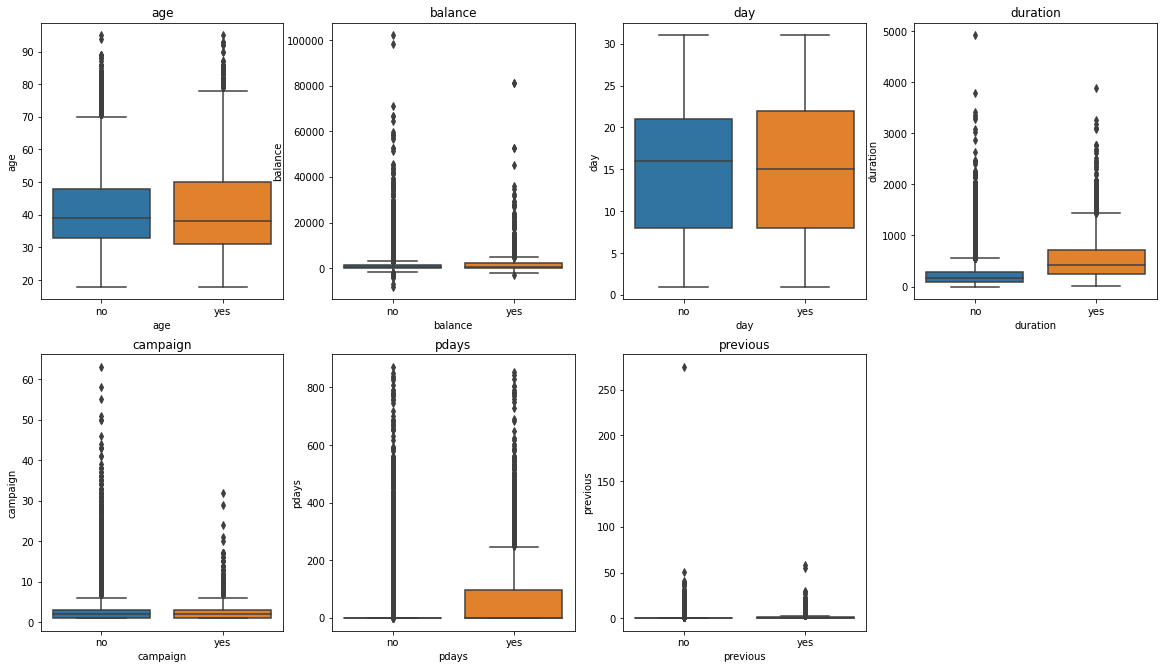

In [514]:
#Relationship between Numerical Features and Label Y
plt.figure(figsize=(20,60))
plotnumber =1
for numericalFeature in numericalFeatures:
    ax = plt.subplot(10,4,plotnumber)
    sns.boxplot(x='y', y=data[numericalFeature], data = data)
    plt.xlabel(numericalFeature)
    plt.title(numericalFeature)
    plotnumber+=1
plt.show()

**Ratio in Y label**

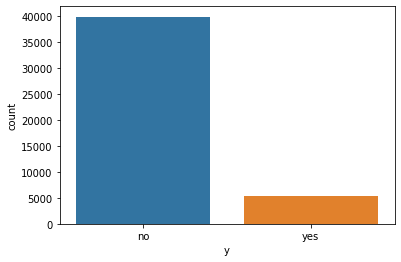

In [515]:
sns.countplot(x='y',data=data)
plt.show()

In [516]:
data['y'].groupby(data['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

**Feature Engineering**

In [517]:
data2 =data.copy()
data2.shape

(45211, 17)

In [518]:
#defaut features does not play important role in Y label
data2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [519]:
# Delete default features
data2.drop(['default'],axis=1, inplace=True)

In [520]:
#pdays features does not play important role in Y label
data2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [521]:
# Delete pdays features
data2.drop(['pdays'],axis=1, inplace=True)

In [522]:
#Converting calategorical Features into numerical Features
catagoricalColumns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  catagoricalColumns:
    data2 = pd.concat([data2.drop(col, axis=1),pd.get_dummies(data2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [523]:
#Converting binary calategorical Features into numerical Features
boolColumns = ['housing', 'loan', 'y']
for col in  boolColumns:
    data2[col+'New']=data2[col].apply(lambda x : 1 if x == 'yes' else 0)
    data2.drop(col, axis=1, inplace=True)

In [524]:
data2

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housingNew,loanNew,yNew
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45207,71,1729,17,456,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45208,72,5715,17,1127,5,3,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
45209,57,668,17,508,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


**Prepare Dataset for Training and Testing**

In [525]:
X = data2.drop(['yNew'],axis=1)
Y = data2['yNew']
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2, random_state=0)
print(" For Training data =",len(trainX), "\n For Testing data =",len(testX))

 For Training data = 36168 
 For Testing data = 9043


**Building Model using LinearSVC**

In [526]:
# Here, We have use LinearSVC for building our model
modelSVC= LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001,C=0.55, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=42, max_iter=1000)

**Model Training**

In [527]:
modelSVC.fit(trainX,trainY)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.55, random_state=42)

**Evalute the Model on test dataset**

In [528]:
predictY=modelSVC.predict(testX)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))

0.892734711931881
[[7871  109]
 [ 861  202]]
              precision    recall  f1-score   support

           0    0.90140   0.98634   0.94196      7980
           1    0.64952   0.19003   0.29403      1063

    accuracy                        0.89273      9043
   macro avg    0.77546   0.58818   0.61799      9043
weighted avg    0.87179   0.89273   0.86579      9043

